# Capítulo 01 - Econometria Básica - Gujarati e Porter

***

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#plt.style.use(['science', 'notebook', 'grid', 'dark_background'])
# plt.style.use(['science', 'notebook', 'grid'])

sns.set(font='Franklin Gothic Book',
        rc={
 'axes.axisbelow': False,
 'axes.edgecolor': 'lightgrey',
 'axes.facecolor': 'None',
 'axes.grid': False,
 'axes.labelcolor': 'dimgrey',
 'axes.spines.right': False,
 'axes.spines.top': False,
 'figure.facecolor': 'white',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'text.color': 'dimgrey',
 'xtick.bottom': False,
 'xtick.color': 'dimgrey',
 'xtick.direction': 'out',
 'xtick.top': False,
 'ytick.color': 'dimgrey',
 'ytick.direction': 'out',
 'ytick.left': False,
 'ytick.right': False})

sns.set_context("notebook", rc={"font.size":16,
                                "axes.titlesize":20,
                                "axes.labelsize":16})

## Exercícios 1.1 e 1.2


In [2]:
# Dados e gráficos das questões 1.1 e 1.2
# Carregando os dados e exibindo as 5 primeira observações
df = pd.read_excel("dados/ERP-2007/ERP-2007-table108.xls", header=1, skiprows=[i for i in range(2, 43)], nrows=26)
df.columns = ['Year', 'United States', 'Canada', 'Japan', 'France', 'Germany', 'Italy', 'United Kingdom']

df.head()

,Year,United States,Canada,Japan,France,Germany,Italy,United Kingdom
0,1980,82.4,76.1,91.0,72.2,86.7,63.9,78.5
1,1981,90.9,85.6,95.3,81.8,92.2,75.5,87.9
2,1982,96.5,94.9,98.1,91.7,97.0,87.8,95.4
3,1983,99.6,100.4,99.8,100.3,100.3,100.8,99.8
4,1984,103.9,104.7,102.1,108.0,102.7,111.4,104.8


In [3]:
# Calculando a taxa de inflação
for country in df.columns[1:]:
    df[f'{country}_inflation'] = np.around(((np.diff(df[f'{country}']) / df[f'{country}'][:-1]) * 100), decimals=2)

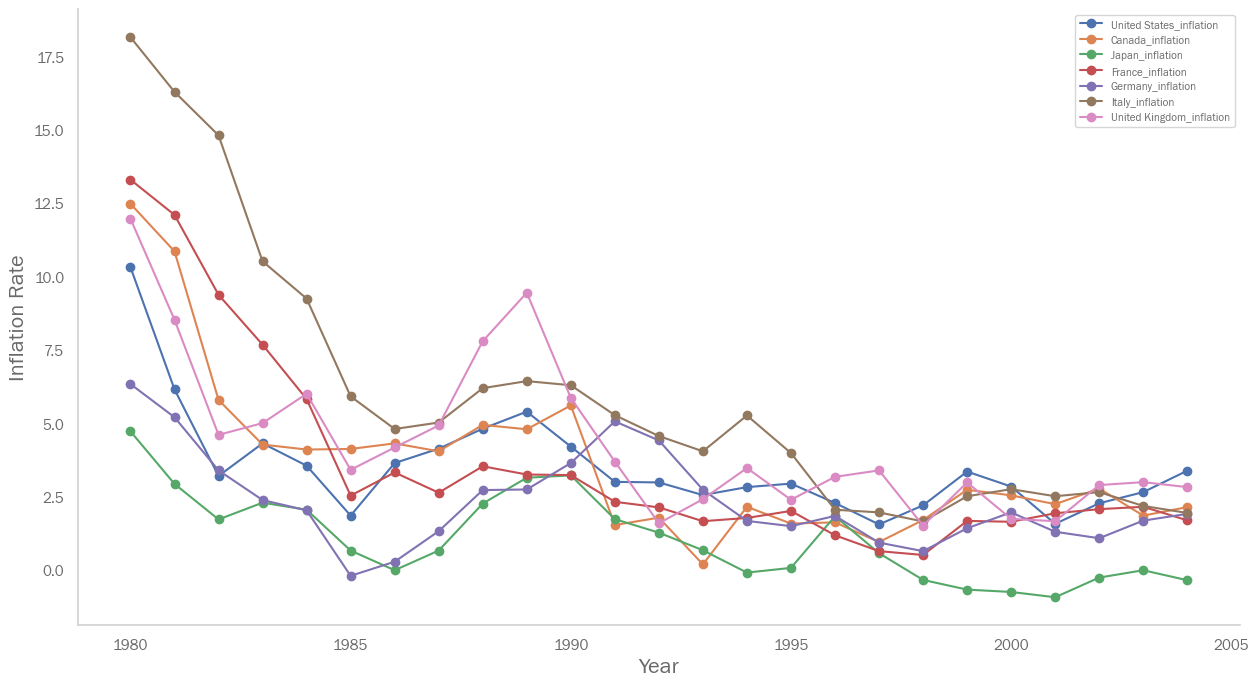

In [4]:
# Gráficos
plt.figure(figsize=(15, 8))

for view in df.columns[8:]:
    plt.plot('Year', view, 'o-', data=df)

plt.legend(loc='upper right', fontsize=8)
plt.xlabel('Year')
plt.ylabel('Inflation Rate')
plt.show()

## Exercício 1.3

In [6]:
# Lendo e tratando os dados
df = pd.read_excel("dados/ERP-2007/ERP-2007-table110.xls", header=2, skiprows=[3, 4], nrows=22)
df = df[['Period', 'Australia (dollar) 2', 'Canada (dollar)', 'China, P.R. (yuan)', 'Japan (yen)', 'Mexico (peso)', 'South Korea (won)', 'Sweden (krona)', 'Switzerland (franc)', 'United Kingdom (pound) 2']]
df.columns = ['Period', 'Australia', 'Canada', 'China', 'Japan', 'Mexico', 'South Korea', 'Sweden', 'Switzerland', 'United Kingdom']

# Passando o Reino Unido de dolar/libra para libra/dolar
df['United Kingdom'] = np.around(df['United Kingdom'] ** -1, decimals=4)

df.head()

,Period,Australia,Canada,China,Japan,Mexico,South Korea,Sweden,Switzerland,United Kingdom
0,1985,0.7003,1.3659,2.9434,238.47,0.257,872.45,8.6032,2.4552,0.7708
1,1986,0.6709,1.3896,3.4616,168.35,0.612,884.60,7.1273,1.7979,0.6813
2,1987,0.7014,1.3259,3.7314,144.60,1.378,826.16,6.3469,1.4918,0.6098
3,1988,0.7841,1.2306,3.7314,128.17,2.273,734.52,6.1370,1.4643,0.5614
4,1989,0.7919,1.1842,3.7673,138.07,2.461,674.13,6.4559,1.6369,0.6104


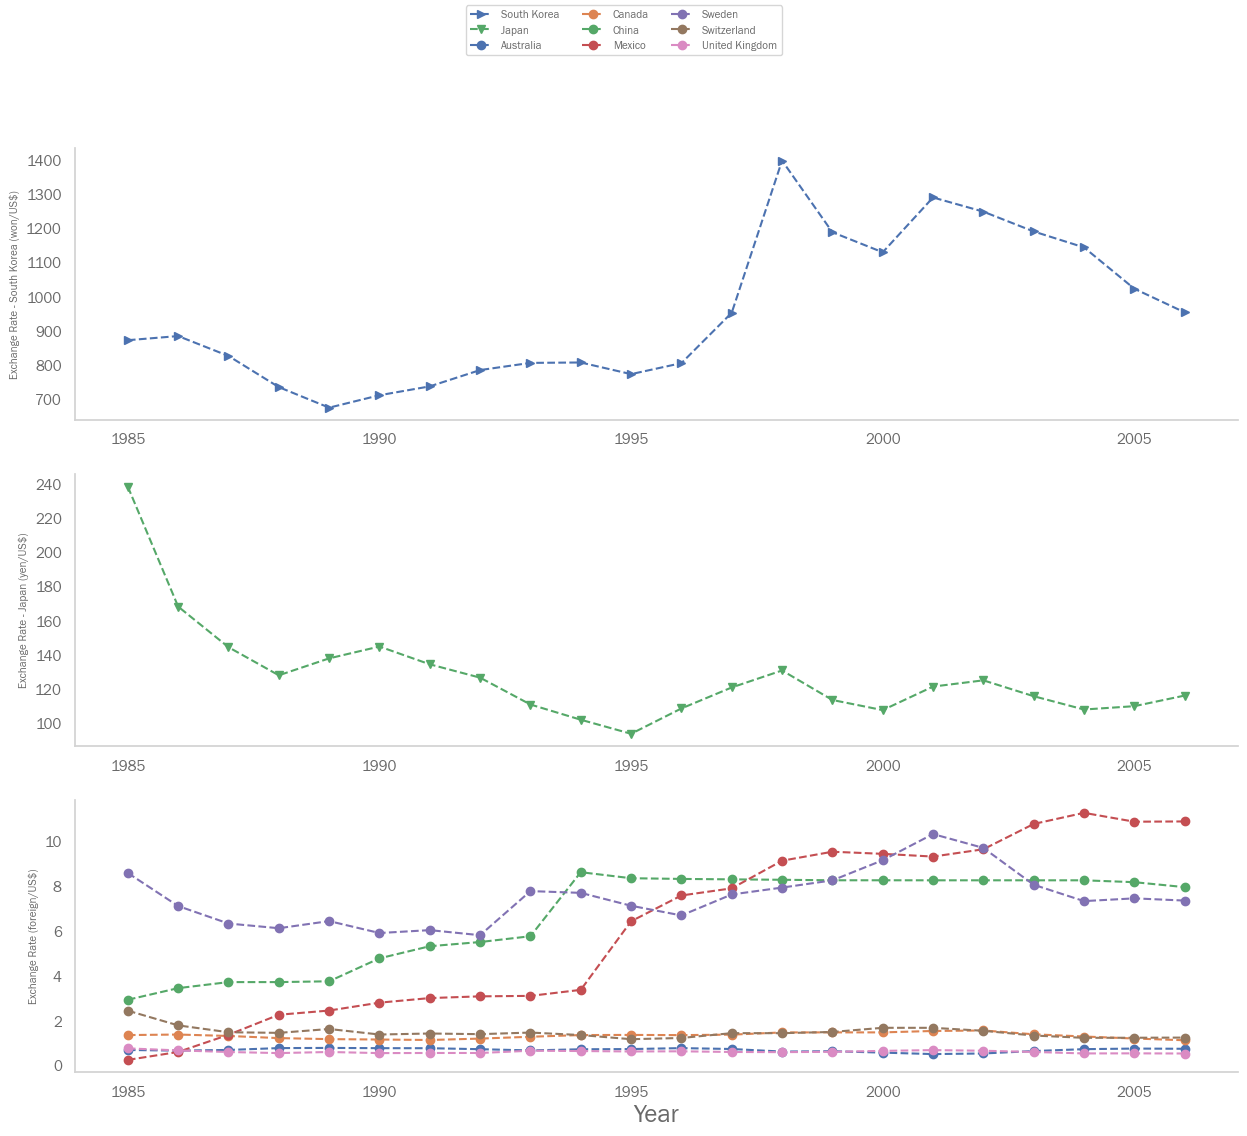

In [7]:
# Gráficos

fig, axes = plt.subplots(3, 1, figsize=(15, 12))

axes[0].plot('Period', 'South Korea', '>--b', data=df)
axes[0].set_ylabel('Exchange Rate - South Korea (won/US$)', fontsize=8)

axes[1].plot('Period', 'Japan', 'v--g', data=df)
axes[1].set_ylabel('Exchange Rate - Japan (yen/US$)', fontsize=8)

for view in df.columns[1:]:
    if view not in ('South Korea', 'Japan'):
        axes[2].plot('Period', view, 'o--', data=df)

fig.legend(loc='upper center', fontsize=8, ncol=3)

axes[2].set_xlabel('Year')
axes[2].set_ylabel('Exchange Rate (foreign/US$)', fontsize=8)
plt.show()

## Exercício 1.7


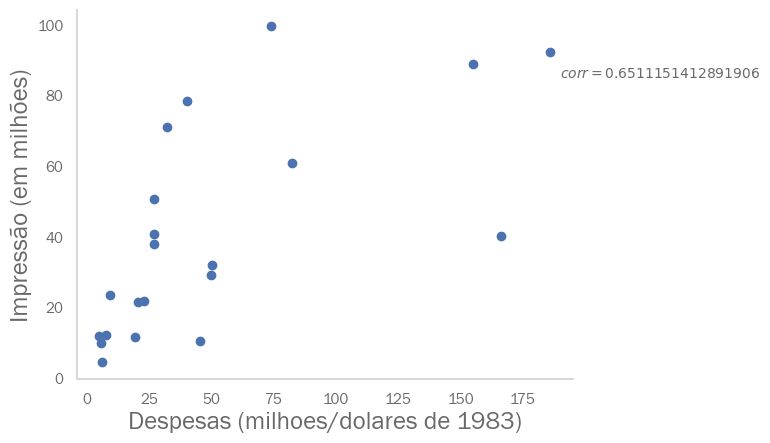

In [8]:
df = pd.read_excel('dados/tvadsdata.xlsx')
df.columns = ['Empresa', 'Impressão (em milhões)', 'Despesas (milhoes/dolares de 1983)']

plt.scatter('Despesas (milhoes/dolares de 1983)', 'Impressão (em milhões)', data=df)
plt.xlabel('Despesas (milhoes/dolares de 1983)')
plt.ylabel('Impressão (em milhões)')

corrcoef = np.corrcoef(df['Despesas (milhoes/dolares de 1983)'], df['Impressão (em milhões)'])[0][1]
plt.text(230, 85, fr'$corr = {corrcoef}$', ha='center', fontsize=10) 
                       
plt.show()